# EDA & modelization

## Loading main packages 

In [2]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from xgboost import XGBRegressor
from xgboost import plot_tree
from xgboost import to_graphviz
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping


## Exploratory Data Analysis 

### File and parameters loading

In [3]:
problem_type = 'regression'

In [4]:
stacking = 'True'

In [5]:
data_size = 'large'

In [6]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.5/dataset/concrete_data.csv')

In [7]:
target_col = 'Strength'

In [8]:
user_drop_cols = []

In [9]:
threshold_NaN = 0.5

In [10]:
threshold_cat = 3

In [11]:
threshold_Z = 3.0

### Dataset Information

In [12]:
df.shape

(1030, 9)

Some records

In [13]:
display(df)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Dataframe structure

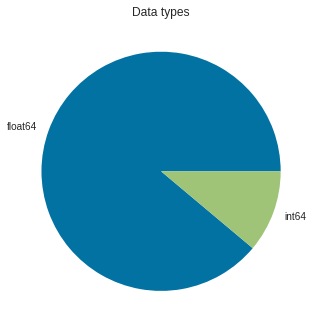

In [14]:
plot_dataframe_structure(df)

### Dataframe statistics

In [15]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Which columns could be categorical ?

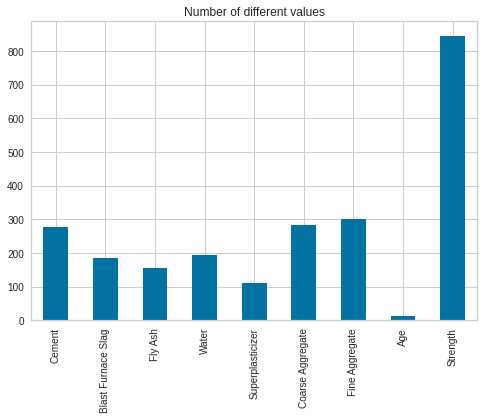

In [16]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [17]:
duplicates(df)

Number of rows before removing: 1030
Number of duplicate rows: 25
Number of rows after removing: 1005


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Drop user's columns:

In [18]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [19]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [20]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [21]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [22]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [23]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: Cement
Encoding numeric column: Blast Furnace Slag
Encoding numeric column: Fly Ash
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: Coarse Aggregate
Encoding numeric column: Fine Aggregate
Encoding numeric column: Age
Encoding numeric column: Strength


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


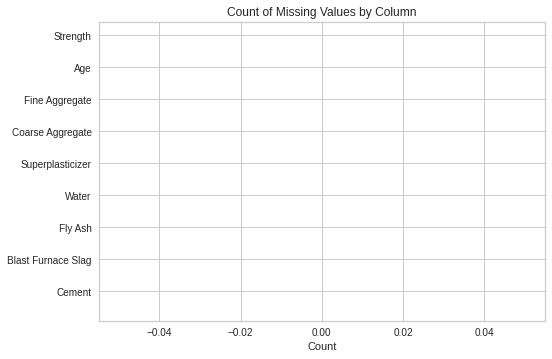

In [24]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [25]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [26]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.07MB
Memory usage after optimization is: 0.02MB
Decreased by 74.9%


Dataframe structure after compression

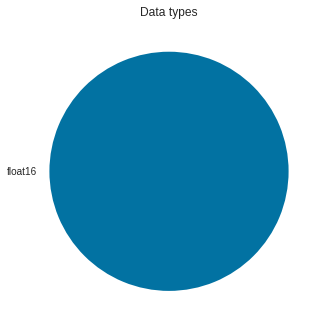

In [27]:
plot_dataframe_structure(df)

#### Outliers:

In [28]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


#### Splitting dataframe in features and targets

In [29]:
y = df[target_col]

In [30]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

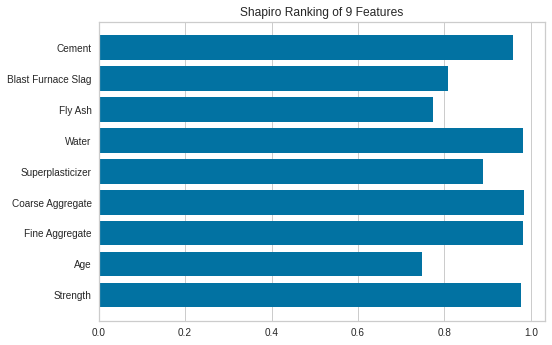

In [31]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

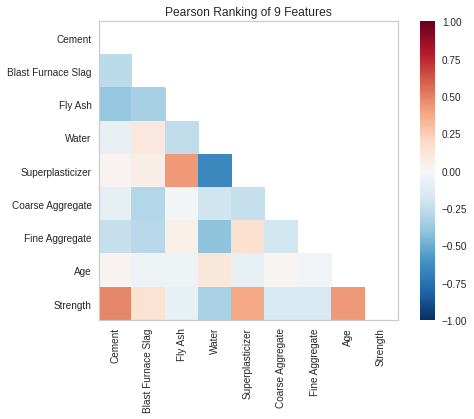

In [32]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

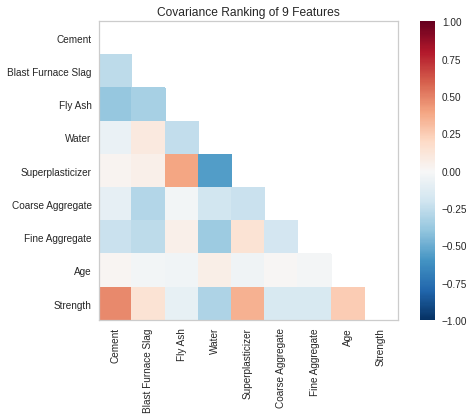

In [33]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

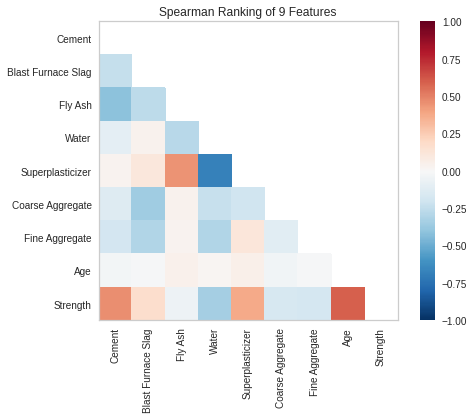

In [34]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

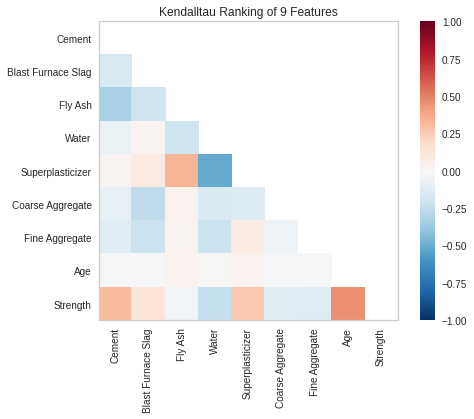

In [35]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

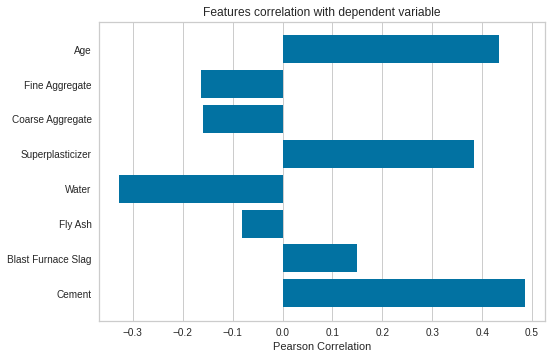

In [36]:
feature_correlation(X, y);

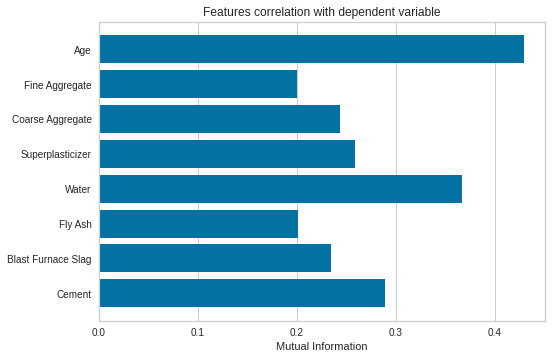

In [37]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

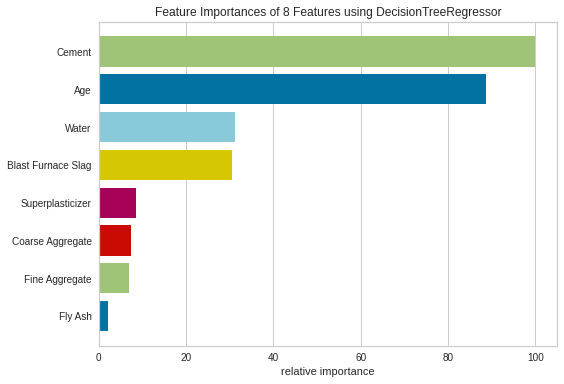

In [38]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

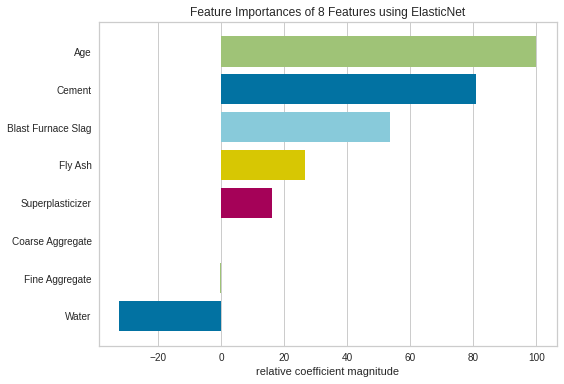

In [39]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

## Splitting data in train and test sets 

In [40]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modeling

### Building the model

Keras neural network definition

In [41]:
def K_Regre(X=X, y=y): 
    keras.backend.clear_session()
#   neural network architecture: start  
    model = Sequential() 
    model.add(Dense(len(X.columns.tolist()) + 1 + 2, input_dim=len(X.columns.tolist()), 
              activation='relu')) 
#   model.add(Dense(len(X.columns.tolist()) + 1 + 2, activation='relu')) 
    model.add(Dense(1)) 
    model.compile(loss='mean_squared_error', optimizer='adam') 
#   neural network architecture: end   
    return model  
#   Keras training parameters: epoch and batch_size 
K_R = KerasRegressor(build_fn=K_Regre, epochs=200, batch_size=5, verbose=0) 
K_R._estimator_type = 'regressor'

Level-0 models

In [42]:
level_0 = [ 
          ( 'RFR' , RandomForestRegressor(max_depth=5, n_estimators=10, max_features='auto') ), 
          ( 'ABR' , AdaBoostRegressor() ), 
          ( 'SGDR' , SGDRegressor(loss='squared_loss') ), 
          ( 'ELNE' , ElasticNet(alpha=0.01, l1_ratio=0.5) ), 
          ( 'SVRL' , SVR(kernel='linear') ), 
          ( 'SVRP' , SVR(kernel='poly') ), 
          ( 'SVRG' , SVR(kernel='rbf') ), 
          ( 'XGBR' , XGBRegressor(max_depth=5, n_estimators=20, verbosity=0) ), 
          ( 'KERR' , K_R ), 
          ]

Level-1 model

In [43]:
level_1 = MLPRegressor()

Stacking for regression

In [44]:
model = StackingRegressor(level_0, final_estimator=level_1)

### Model fitting

In [45]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 4min 26s, sys: 1min 29s, total: 5min 56s
Wall time: 3min 3s


StackingRegressor(estimators=[('RFR',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=10)),
                              ('ABR', AdaBoostRegressor()),
                              ('SGDR', SGDRegressor()),
                              ('ELNE', ElasticNet(alpha=0.01)),
                              ('SVRL', SVR(kernel='linear')),
                              ('SVRP', SVR(kernel='poly')), ('SVRG', SVR()),
                              ('XGBR',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=20, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                            reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=0)),
                              ('KERR',
                               <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb11c49dcd0>)],
                  final_estimator=MLPRegressor())

#### Keras neural network description

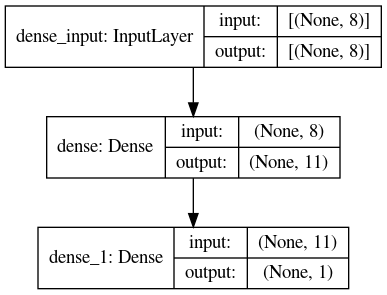

In [46]:
plot_model(K_Regre(X,y), show_shapes=True, show_layer_names=True)

### Model evaluation

#### Model scoring

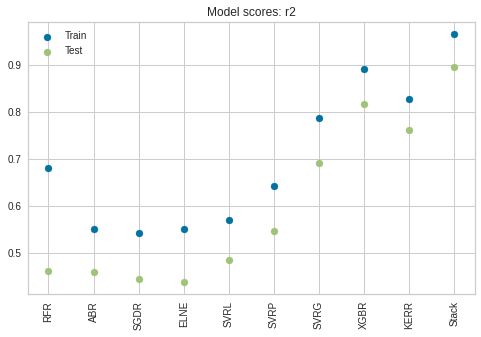

array([['RFR', 0.6793922400871093, 0.46032846766207525],
       ['ABR', 0.5510457434869758, 0.4584120883123337],
       ['SGDR', 0.5427694674580299, 0.4437316173920425],
       ['ELNE', 0.5513860995803463, 0.4383071645737212],
       ['SVRL', 0.5693774766331116, 0.4848848363774707],
       ['SVRP', 0.6414379065199913, 0.5469496182575944],
       ['SVRG', 0.7859489624181377, 0.6918206046073951],
       ['XGBR', 0.891417228041954, 0.8174121228184026],
       ['KERR', 0.8268605966774158, 0.7613148099416511],
       ['Stack', 0.965036643320598, 0.8959428516502381]], dtype=object)

In [47]:
score_stacking_r(model, X_train, y_train, X_test, y_test)

#### Residuals plot

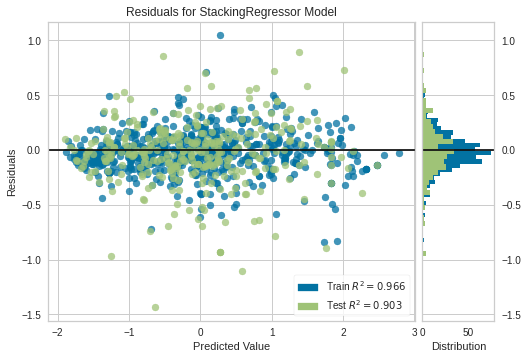

In [48]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

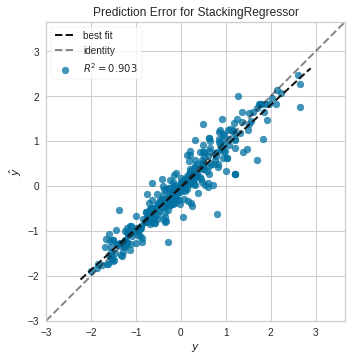

In [49]:
prediction_error(model, X_train, y_train, X_test, y_test);